In [8]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/path/aa_dataset-tickets-multi-lang-5-2-50-version.csv")
df.head()

,subject,body,answer,type,queue,priority,language,version,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
0,Wesentlicher Sicherheitsvorfall,"Sehr geehrtes Support-Team,\n\nich möchte eine...",Vielen Dank für die Meldung des kritischen Sic...,Incident,Technical Support,high,de,51,Security,Outage,Disruption,Data Breach,NaN,NaN,NaN,NaN
1,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...","Thank you for reaching out, <name>. We are awa...",Incident,Technical Support,high,en,51,Account,Disruption,Outage,IT,Tech Support,NaN,NaN,NaN
2,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",Thank you for your inquiry. Our products suppo...,Request,Returns and Exchanges,medium,en,51,Product,Feature,Tech Support,NaN,NaN,NaN,NaN,NaN
3,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this mes...",We appreciate you reaching out with your billi...,Request,Billing and Payments,low,en,51,Billing,Payment,Account,Documentation,Feedback,NaN,NaN,NaN
4,Question About Marketing Agency Software Compa...,"Dear Support Team,\n\nI hope this message reac...",Thank you for your inquiry. Our product suppor...,Problem,Sales and Pre-Sales,medium,en,51,Product,Feature,Feedback,Tech Support,NaN,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28587 entries, 0 to 28586
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   subject   24749 non-null  object
 1   body      28587 non-null  object
 2   answer    28580 non-null  object
 3   type      28587 non-null  object
 4   queue     28587 non-null  object
 5   priority  28587 non-null  object
 6   language  28587 non-null  object
 7   version   28587 non-null  int64 
 8   tag_1     28587 non-null  object
 9   tag_2     28574 non-null  object
 10  tag_3     28451 non-null  object
 11  tag_4     25529 non-null  object
 12  tag_5     14545 non-null  object
 13  tag_6     5874 non-null   object
 14  tag_7     2040 non-null   object
 15  tag_8     565 non-null    object
dtypes: int64(1), object(15)
memory usage: 3.5+ MB


In [11]:
df.isnull().sum()

subject      3838
body            0
answer          7
type            0
queue           0
priority        0
language        0
version         0
tag_1           0
tag_2          13
tag_3         136
tag_4        3058
tag_5       14042
tag_6       22713
tag_7       26547
tag_8       28022
dtype: int64

In [12]:
print('The number of different types are: ') 
print(df['type'].value_counts())
print('\n')
print('The number of different languages are: ')
print(df['language'].value_counts())
print('\n')
print('The number of different versions are: ')
print(df['version'].value_counts())

The number of different types are: 
type
Incident    11466
Request      8187
Problem      6012
Change       2922
Name: count, dtype: int64


The number of different languages are: 
language
en    16338
de    12249
Name: count, dtype: int64


The number of different versions are: 
version
400    18599
52      9119
51       869
Name: count, dtype: int64


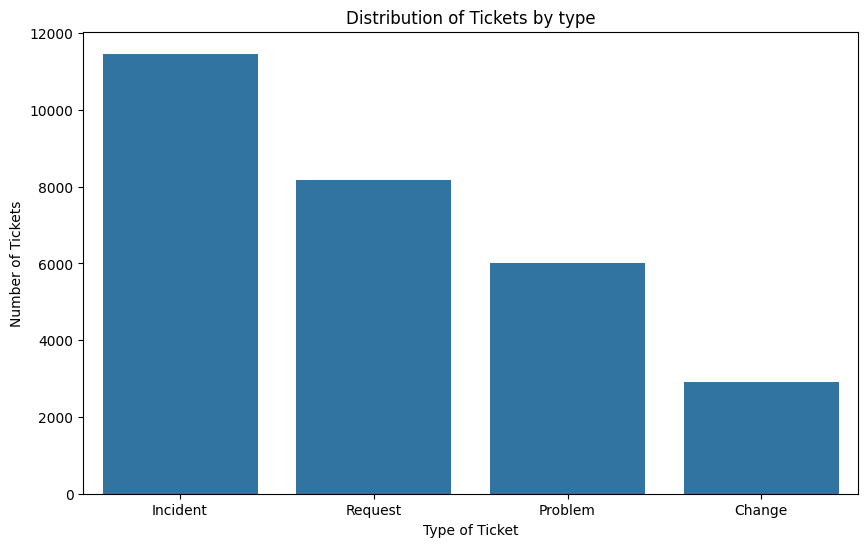

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='type', order=df['type'].value_counts().index)
plt.title('Distribution of Tickets by type')
plt.xlabel('Type of Ticket')
plt.ylabel('Number of Tickets')
plt.show()

In [14]:
from kmodes.kmodes import KModes

X_features = df[['type', 'language', 'version']]
km = KModes(n_clusters=3, init='Cao', n_init=5, verbose=0, random_state=42)
km = KModes(n_clusters=3)

In [15]:
clusters = km.fit_predict(X_features)

In [16]:
df['cluster'] = clusters
df.head()

,subject,body,answer,type,queue,priority,language,version,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,cluster
0,Wesentlicher Sicherheitsvorfall,"Sehr geehrtes Support-Team,\n\nich möchte eine...",Vielen Dank für die Meldung des kritischen Sic...,Incident,Technical Support,high,de,51,Security,Outage,Disruption,Data Breach,NaN,NaN,NaN,NaN,0
1,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...","Thank you for reaching out, <name>. We are awa...",Incident,Technical Support,high,en,51,Account,Disruption,Outage,IT,Tech Support,NaN,NaN,NaN,0
2,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",Thank you for your inquiry. Our products suppo...,Request,Returns and Exchanges,medium,en,51,Product,Feature,Tech Support,NaN,NaN,NaN,NaN,NaN,0
3,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this mes...",We appreciate you reaching out with your billi...,Request,Billing and Payments,low,en,51,Billing,Payment,Account,Documentation,Feedback,NaN,NaN,NaN,0
4,Question About Marketing Agency Software Compa...,"Dear Support Team,\n\nI hope this message reac...",Thank you for your inquiry. Our product suppor...,Problem,Sales and Pre-Sales,medium,en,51,Product,Feature,Feedback,Tech Support,NaN,NaN,NaN,NaN,0


In [17]:
for i in df['cluster'].unique():
    
    # 1. Get all summaries for the current cluster (e.g., cluster 0)
    cluster_subjects = df[df['cluster'] == i]['subject']
    
    # 2. Find the mode (most frequent summary) for this cluster
    # We use .dropna() to make sure NaN values don't become the mode
    # We use [0] because .mode() returns a Series
    if cluster_subjects.dropna().empty:
        # If the cluster has NO summaries, fill with a default value
        subject_mode = "Unknown"
    else:
        subject_mode = cluster_subjects.dropna().mode()[0]
    
    print(f"Cluster {i}'s Mode Subject is: '{subject_mode}'")
    
    # 3. Define the rows to fill:
    #    - Must be in the current cluster (df['cluster'] == i)
    #    - AND the summary must be missing (df['summary'].isnull())
    row_filter = (df['cluster'] == i) & (df['subject'].isnull())
    
    # 4. Fill the missing values using .loc
    df.loc[row_filter, 'subject'] = subject_mode

print("\n")

Cluster 0's Mode Subject is: ' Assistance Request'
Cluster 1's Mode Subject is: ' Bitte um Ausführliche Informationen zur Datenaufbereitungsdienstleistung'
Cluster 2's Mode Subject is: '-issue with file upload size'




In [18]:
# We can drop the temporary 'cluster' column now
df_imputed = df.drop('cluster', axis=1)

print("--- Final Data (After Imputation) ---")
print(df_imputed)

--- Final Data (After Imputation) ---
                                                 subject  \
0                        Wesentlicher Sicherheitsvorfall   
1                                     Account Disruption   
2      Query About Smart Home System Integration Feat...   
3                      Inquiry Regarding Invoice Details   
4      Question About Marketing Agency Software Compa...   
...                                                  ...   
28582       Performance Problem with Data Analytics Tool   
28583          Datensperrung in der Kundschaftsbetreuung   
28584      Problem mit der Videokonferenz-Software heute   
28585  Update Request for SaaS Platform Integration F...   
28586          Inquiry About Project Management Features   

                                                    body  \
0      Sehr geehrtes Support-Team,\n\nich möchte eine...   
1      Dear Customer Support Team,\n\nI am writing to...   
2      Dear Customer Support Team,\n\nI hope this mes...   
3

In [19]:
df['cluster'] = clusters
df.head()

,subject,body,answer,type,queue,priority,language,version,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,cluster
0,Wesentlicher Sicherheitsvorfall,"Sehr geehrtes Support-Team,\n\nich möchte eine...",Vielen Dank für die Meldung des kritischen Sic...,Incident,Technical Support,high,de,51,Security,Outage,Disruption,Data Breach,NaN,NaN,NaN,NaN,0
1,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...","Thank you for reaching out, <name>. We are awa...",Incident,Technical Support,high,en,51,Account,Disruption,Outage,IT,Tech Support,NaN,NaN,NaN,0
2,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",Thank you for your inquiry. Our products suppo...,Request,Returns and Exchanges,medium,en,51,Product,Feature,Tech Support,NaN,NaN,NaN,NaN,NaN,0
3,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this mes...",We appreciate you reaching out with your billi...,Request,Billing and Payments,low,en,51,Billing,Payment,Account,Documentation,Feedback,NaN,NaN,NaN,0
4,Question About Marketing Agency Software Compa...,"Dear Support Team,\n\nI hope this message reac...",Thank you for your inquiry. Our product suppor...,Problem,Sales and Pre-Sales,medium,en,51,Product,Feature,Feedback,Tech Support,NaN,NaN,NaN,NaN,0


In [20]:
for i in df['cluster'].unique():
    
    # 1. Get all summaries for the current cluster (e.g., cluster 0)
    cluster_answers = df[df['cluster'] == i]['answer']
    
    # 2. Find the mode (most frequent summary) for this cluster
    # We use .dropna() to make sure NaN values don't become the mode
    # We use [0] because .mode() returns a Series
    if cluster_answers.dropna().empty:
        # If the cluster has NO summaries, fill with a default value
        answer_mode = "Unknown"
    else:
        answer_mode = cluster_answers.dropna().mode()[0]
    
    print(f"Cluster {i}'s Mode Answer is: '{answer_mode}'")
    
    # 3. Define the rows to fill:
    #    - Must be in the current cluster (df['cluster'] == i)
    #    - AND the summary must be missing (df['summary'].isnull())
    row_filter = (df['cluster'] == i) & (df['answer'].isnull())
    
    # 4. Fill the missing values using .loc
    df.loc[row_filter, 'answer'] = answer_mode

print("\n")

Cluster 0's Mode Answer is: ' Nehmen wir diesen Fall ernst. Bitte bereiten Sie zusätzliche Details des Vorfalls vor und rufen Sie uns unter <tel_num> an. Wir werden die nächsten Schritte zur Sicherung der Systeme besprechen.'
Cluster 1's Mode Answer is: '<Name> is responding to your request for detailed documentation on the SaaS project management platform's scalability and integration features. We appreciate your interest and are happy to provide the information you need. The platform is designed to handle large volumes of data and integrates a variety of tools and services. A range of resources are available to demonstrate the platform's effectiveness, including case studies and whitepapers. We will provide a link to the resource library where you can access this information. Alternatively, we can send you a tailored document.'
Cluster 2's Mode Answer is: '<name> Service Desk Team can assist with the synchronization issues in Zoho CRM and Adobe Sign. We have already attempted to reso

In [21]:
# We can drop the temporary 'cluster' column now
df_new = df.drop('cluster', axis=1)

print("--- Final Data (After Imputation) ---")
print(df_new)

--- Final Data (After Imputation) ---
                                                 subject  \
0                        Wesentlicher Sicherheitsvorfall   
1                                     Account Disruption   
2      Query About Smart Home System Integration Feat...   
3                      Inquiry Regarding Invoice Details   
4      Question About Marketing Agency Software Compa...   
...                                                  ...   
28582       Performance Problem with Data Analytics Tool   
28583          Datensperrung in der Kundschaftsbetreuung   
28584      Problem mit der Videokonferenz-Software heute   
28585  Update Request for SaaS Platform Integration F...   
28586          Inquiry About Project Management Features   

                                                    body  \
0      Sehr geehrtes Support-Team,\n\nich möchte eine...   
1      Dear Customer Support Team,\n\nI am writing to...   
2      Dear Customer Support Team,\n\nI hope this mes...   
3

In [22]:
df_new.head()

,subject,body,answer,type,queue,priority,language,version,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
0,Wesentlicher Sicherheitsvorfall,"Sehr geehrtes Support-Team,\n\nich möchte eine...",Vielen Dank für die Meldung des kritischen Sic...,Incident,Technical Support,high,de,51,Security,Outage,Disruption,Data Breach,NaN,NaN,NaN,NaN
1,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...","Thank you for reaching out, <name>. We are awa...",Incident,Technical Support,high,en,51,Account,Disruption,Outage,IT,Tech Support,NaN,NaN,NaN
2,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",Thank you for your inquiry. Our products suppo...,Request,Returns and Exchanges,medium,en,51,Product,Feature,Tech Support,NaN,NaN,NaN,NaN,NaN
3,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this mes...",We appreciate you reaching out with your billi...,Request,Billing and Payments,low,en,51,Billing,Payment,Account,Documentation,Feedback,NaN,NaN,NaN
4,Question About Marketing Agency Software Compa...,"Dear Support Team,\n\nI hope this message reac...",Thank you for your inquiry. Our product suppor...,Problem,Sales and Pre-Sales,medium,en,51,Product,Feature,Feedback,Tech Support,NaN,NaN,NaN,NaN
